## 회귀분석
- 회귀 분석은 실젯값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가 지표가 발전
- 실젯값과 예측값의 차이를 구해서 이것들을 단순히 합하게 되면 +와 -가 섞여 오류를 상쇄할 수 있다.

### MAE
- 실젯값과 예측값의 차이를 절댓값으로 변환하여 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다

### MSE
- 실젯값과 예측값의 차이를 제곱해 평균한 것
- 실젯값과 예측값 차이의 면적 합을 의미
- 특이값이 존재하면 수치가 증가

### RMSE
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 루트
- 에러에 제곱을 하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MLSE
- 실젯값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

### 회귀분석의 순서
1. 데이터를 확인
2. 데이터를 분할
3. 데이터의 전처리
4. 모델 학습
5. 성능평가 및 예측값 저장

In [1]:
import pandas as pd
boston=pd.read_csv("../datasets/boston.csv")
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
## 데이터프레임의 확인
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
## 결측치 확인
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

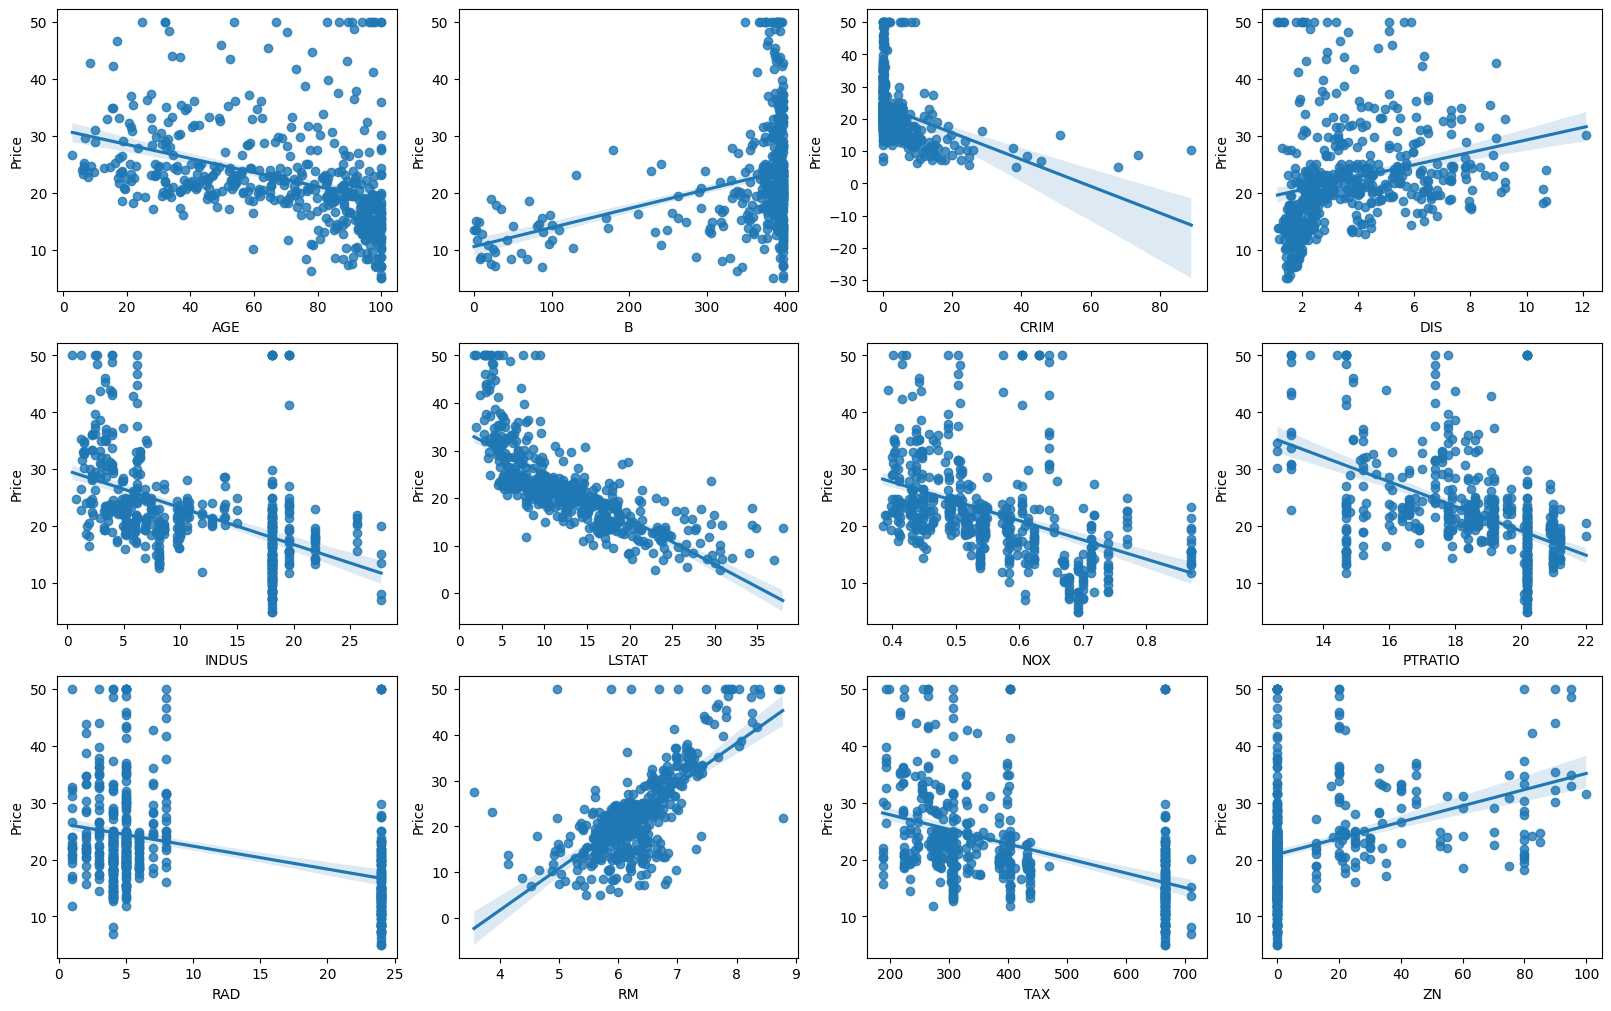

In [4]:
## 산점되와 선형 회귀 직선 시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(figsize=(16,10),ncols=4,nrows=3,constrained_layout=True)

featrues=boston.columns.difference(['Price','CHAS'])

for i,featrue in zip(range(12),featrues):
    row = int(i/4)
    col=i%4
    sns.regplot(x= featrue,y=boston['Price'],data=boston,ax=axs[row][col])
plt.show()

In [5]:
## 데이터의 분한

from sklearn.model_selection import train_test_split

x= boston[['CRIM','ZN','INDUS','NOX','RM',"AGE",'DIS','RAD','TAX','PTRATIO','B','LSTAT']].values
y = boston['Price'].values

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
print("학습데이터 price의 평균 :",y_train.mean())
print("학습데이터 price의 평균 :",y_test.mean())

학습데이터 price의 평균 : 22.796534653465343
학습데이터 price의 평균 : 21.488235294117644


In [7]:
## 데이터 전처리
## 비율, 농도, 계수 등 서로 다른 단위를 가진 연속형 자료
## Min-Max 방법으로 정규화

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train_sc =scaler.fit_transform(x_train)

In [16]:
## 모델 학습
## linearRegression(선형 회귀) 알고리즘
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train_sc,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

## predict()로 학습데이터를 예측한 값에 저장
pred = linear.predict(x_train_sc)

mae= mean_absolute_error(y_train,pred)
mse = mean_squared_error(y_train,pred)
rmse =np.sqrt(mse)

## 결정계수 출력
r2= r2_score(y_train,pred)

print("MAE :",round(mae,5) )
print("MSE :",round(mse,5) )
print("RMSE :",round(rmse,5) )
print("R2 :",round(r2,5) )

MAE : 3.32616
MSE : 22.11246
RMSE : 4.70239
R2 : 0.74546


In [10]:
## 성능평가 및 예측값 저장
## x_test를 sclaer.transform()에 입력하여 x_train과 같은 방식으로 Min_Max 정규화 수행
## x_test_sc를 훈련된 모델에 입력해 예측값을 pred_t에 저장

x_test_sc = scaler.transform(x_test)
pred_t =linear.predict(x_test_sc)

mae= mean_absolute_error(y_test,pred_t)
mse = mean_squared_error(y_test,pred_t)
rmse =np.sqrt(mse)
## 결정계수 출력
r2= r2_score(y_test,pred_t)

print("MAE :",round(mae,5) )
print("MSE :",round(mse,5) )
print("RMSE :",round(rmse,5) )
print("R2 :",round(r2,5) )

MAE : 3.23724
MSE : 24.63539
RMSE : 4.96341
R2 : 0.66406


In [11]:
pred_df = pd.DataFrame(pred_t,columns=["pred Price"])
actual =pd.DataFrame(y_test,columns=['actual Price'])

In [12]:
pred_df.head()

,pred Price
0,29.218660
1,33.551467
2,14.810658
3,25.084725
4,19.173927


In [13]:
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [14]:
## 두개의 데이터프레임을 결합 후 csv로 저장
reg_result =pd.concat([actual,pred_df],axis=1)
reg_result.to_csv("reg_result.csv",index=False,encoding='utf-8')
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927
